In [1]:
# Import essensial liabraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline
import warnings; 
warnings.simplefilter('ignore')

In [2]:
# Import csv file of train data

train_data = pd.read_csv(r"D:\Userdata\Downloads\house-prices-advanced-regression-techniques\train.csv")

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Analyze insights of train dataset

train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Finding null values in dataset

null_columns=train_data.columns[train_data.isnull().any()]
train_data[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
# Delete features with maximum null values

train_data=train_data.drop(columns=["MiscFeature","Fence","Alley","PoolQC","Id"],axis=1)

In [7]:
null_columns=train_data.columns[train_data.isnull().any()]
train_data[null_columns].isnull().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [8]:
# Fill null values

cols = ['MasVnrType', 'MasVnrArea','Electrical','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu'
        ,'GarageType','GarageFinish','GarageQual','GarageCond','FireplaceQu']
train_data.loc[:,cols] = train_data.loc[:,cols].ffill()

In [9]:
for column in ['LotFrontage']:
    train_data['LotFrontage'].fillna(train_data['LotFrontage'].mode()[0], inplace=True)
    
mean_GarageYrBlt= train_data["GarageYrBlt"].mean()
mean_GarageYrBlt=round(mean_GarageYrBlt)
train_data["GarageYrBlt"]=train_data['GarageYrBlt'].fillna(mean_GarageYrBlt)

train_data=train_data.dropna(axis=0)

In [10]:
null_columns=train_data.columns[train_data.isnull().any()]
train_data[null_columns].isnull().sum()

Series([], dtype: float64)

So there is no null values in train dataset

In [11]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000


In [12]:
# Analyzing dependent variable

train_data['SalePrice'].describe()

count      1459.000000
mean     180902.293352
std       79466.457379
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.883151429464548


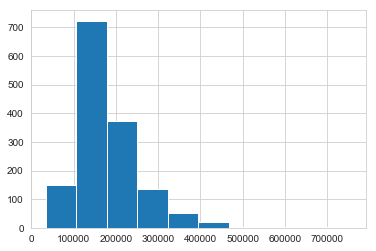

Skew is: 0.12236479135478916


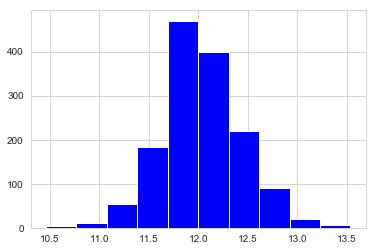

In [13]:
# Determining the Skewness of dependent variable
print ("Skew is:", train_data.SalePrice.skew())

plt.hist(train_data.SalePrice)
plt.show()

# After log transformation of the data it looks much more center aligned
train_data['Skewed_SP'] = np.log(train_data['SalePrice'])
print ("Skew is:", train_data['Skewed_SP'].skew())
plt.hist(train_data['Skewed_SP'], color='blue')
plt.show()

In [14]:
# Mapping categorical columns on the basis of their worthness

train_data.LotShape.value_counts()
val_LotShape={'Reg':4,'IR1':3,'IR2':2,'IR3':1}
train_data['LotShape']=train_data['LotShape'].map(val_LotShape)

train_data.ExterQual.value_counts()
val_ExterQual={'Ex':4,'Gd':3,'TA':2,'Fa':1}
train_data['ExterQual']=train_data['ExterQual'].map(val_ExterQual)

train_data.ExterCond.value_counts()
val_ExterCond={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
train_data['ExterCond']=train_data['ExterCond'].map(val_ExterCond)

train_data.BsmtQual.value_counts()
val_BsmtQual={'Ex':4,'Gd':3,'TA':2,'Fa':1}
train_data['BsmtQual']=train_data['BsmtQual'].map(val_BsmtQual)

train_data.BsmtCond.value_counts()
val_BsmtCond={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
train_data['BsmtCond']=train_data['BsmtCond'].map(val_BsmtCond)

train_data.BsmtExposure.value_counts()
val_BsmtExposure={'Gd':4,'Av':3,'Mn':2,'No':1}
train_data['BsmtExposure']=train_data['BsmtExposure'].map(val_BsmtExposure)

train_data.BsmtFinType1.value_counts()
val_BsmtFinType1={'GLQ':5,'ALQ':4,'BLQ':3,'Rec':4,'LwQ':2,'Unf':1}
train_data['BsmtFinType1']=train_data['BsmtFinType1'].map(val_BsmtFinType1)

train_data.BsmtFinType2.value_counts()
val_BsmtFinType2={'GLQ':5,'ALQ':4,'BLQ':3,'Rec':4,'LwQ':2,'Unf':1}
train_data['BsmtFinType2']=train_data['BsmtFinType2'].map(val_BsmtFinType2)

train_data.HeatingQC.value_counts()
val_HeatingQC={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
train_data['HeatingQC']=train_data['HeatingQC'].map(val_HeatingQC)

train_data.KitchenQual.value_counts()
val_KitchenQual={'Ex':4,'Gd':3,'TA':2,'Fa':1}
train_data['KitchenQual']=train_data['KitchenQual'].map(val_KitchenQual)

train_data.FireplaceQu.value_counts()
val_FireplaceQu={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
train_data['FireplaceQu']=train_data['FireplaceQu'].map(val_FireplaceQu)

train_data.GarageQual.value_counts()
val_GarageQual={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
train_data['GarageQual']=train_data['GarageQual'].map(val_GarageQual)

train_data.GarageCond.value_counts()
val_GarageCond={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
train_data['GarageCond']=train_data['GarageCond'].map(val_GarageCond)

train_data.Street.value_counts()
val_Street={'Grvl':2,'Pave':1}
train_data['Street']=train_data['Street'].map(val_Street)

train_data.Foundation.value_counts()
val_Foundation={'BrkTil':5,'CBlock':4,'PConc':3,'Slab':2,'Stone':1,'Wood':1}
train_data['Foundation']=train_data['Foundation'].map(val_Foundation)

train_data.GarageType.value_counts()
val_GarageType={'2Types':5,'Attchd':4,'Basment':3,'BuiltIn':3,'CarPort':2,'Detchd':1}
train_data['GarageType']=train_data['GarageType'].map(val_GarageType)

train_data.GarageFinish.value_counts()
val_GarageFinish={'Fin':3,'RFn':2,'Unf':1}
train_data['GarageFinish']=train_data['GarageFinish'].map(val_GarageFinish)

train_data.PavedDrive.value_counts()
val_PavedDrive={'Y':3,'P':2,'N':1}
train_data['PavedDrive']=train_data['PavedDrive'].map(val_PavedDrive)

In [15]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Skewed_SP
1,20,RL,80.0,9600,1,4,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,68.0,11250,1,3,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,60.0,9550,1,3,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,84.0,14260,1,3,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,12.429216
5,50,RL,85.0,14115,1,3,Lvl,AllPub,Inside,Gtl,...,320,0,0,700,10,2009,WD,Normal,143000,11.870600


In [16]:
train_data=train_data.drop(columns=["SalePrice"],axis=1)
train_data = train_data.rename(columns={'Skewed_SP': 'SalePrice'})
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,20,RL,80.0,9600,1,4,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,1,3,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,1,3,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,1,3,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,12.429216
5,50,RL,85.0,14115,1,3,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,11.870600


In [17]:
# Importing test data set

test_data = pd.read_csv(r"D:\Userdata\Downloads\house-prices-advanced-regression-techniques\test.csv")

In [18]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [19]:
# Finding Null values in test dataset

null_columns=test_data.columns[test_data.isnull().any()]
test_data[null_columns].isnull().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [20]:
df=test_data['Id']
test_data=test_data.drop(columns=["Id","PoolQC","Alley","Fence","MiscFeature"],axis=1)

In [21]:
null_columns=test_data.columns[test_data.isnull().any()]
test_data[null_columns].isnull().sum()

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
FireplaceQu     730
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64

In [22]:
cols = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType', 'MasVnrArea','BsmtQual','BsmtCond','BsmtExposure',
        'BsmtFinType1','BsmtFinType2','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual',
       'GarageCond','SaleType' ,'GarageArea','GarageCars','BsmtHalfBath','BsmtFullBath','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2'
       ,'BsmtFinSF1']
test_data.loc[:,cols] = test_data.loc[:,cols].ffill()

In [23]:
for column in ['LotFrontage']:
    test_data['LotFrontage'].fillna(test_data['LotFrontage'].mode()[0], inplace=True)

 
mean_GarageYrBlt= test_data["GarageYrBlt"].mean()
mean_GarageYrBlt=round(mean_GarageYrBlt)
test_data["GarageYrBlt"]=test_data['GarageYrBlt'].fillna(mean_GarageYrBlt)

test_data=test_data.dropna(axis=0)

In [24]:
null_columns=test_data.columns[test_data.isnull().any()]
test_data[null_columns].isnull().sum()

Series([], dtype: float64)

So there is no null values in test dataset

In [25]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
5,60,RL,75.0,10000,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,84,0,0,0,0,0,4,2010,WD,Normal
6,20,RL,60.0,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,21,0,0,0,0,500,3,2010,WD,Normal


In [26]:
test_data.LotShape.value_counts()
val_LotShape={'Reg':4,'IR1':3,'IR2':2,'IR3':1}
test_data['LotShape']=test_data['LotShape'].map(val_LotShape)

test_data.ExterQual.value_counts()
val_ExterQual={'Ex':4,'Gd':3,'TA':2,'Fa':1}
test_data['ExterQual']=test_data['ExterQual'].map(val_ExterQual)

test_data.ExterCond.value_counts()
val_ExterCond={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
test_data['ExterCond']=test_data['ExterCond'].map(val_ExterCond)

test_data.BsmtQual.value_counts()
val_BsmtQual={'Ex':4,'Gd':3,'TA':2,'Fa':1}
test_data['BsmtQual']=test_data['BsmtQual'].map(val_BsmtQual)

test_data.BsmtCond.value_counts()
val_BsmtCond={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
test_data['BsmtCond']=test_data['BsmtCond'].map(val_BsmtCond)

test_data.BsmtExposure.value_counts()
val_BsmtExposure={'Gd':4,'Av':3,'Mn':2,'No':1}
test_data['BsmtExposure']=test_data['BsmtExposure'].map(val_BsmtExposure)

test_data.BsmtFinType1.value_counts()
val_BsmtFinType1={'GLQ':5,'ALQ':4,'BLQ':3,'Rec':4,'LwQ':2,'Unf':1}
test_data['BsmtFinType1']=test_data['BsmtFinType1'].map(val_BsmtFinType1)

test_data.BsmtFinType2.value_counts()
val_BsmtFinType2={'GLQ':5,'ALQ':4,'BLQ':3,'Rec':4,'LwQ':2,'Unf':1}
test_data['BsmtFinType2']=test_data['BsmtFinType2'].map(val_BsmtFinType2)

test_data.HeatingQC.value_counts()
val_HeatingQC={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
test_data['HeatingQC']=test_data['HeatingQC'].map(val_HeatingQC)

test_data.KitchenQual.value_counts()
val_KitchenQual={'Ex':4,'Gd':3,'TA':2,'Fa':1}
test_data['KitchenQual']=test_data['KitchenQual'].map(val_KitchenQual)

test_data.FireplaceQu.value_counts()
val_FireplaceQu={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
test_data['FireplaceQu']=test_data['FireplaceQu'].map(val_FireplaceQu)

test_data.GarageQual.value_counts()
val_GarageQual={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
test_data['GarageQual']=test_data['GarageQual'].map(val_GarageQual)

test_data.GarageCond.value_counts()
val_GarageCond={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
test_data['GarageCond']=test_data['GarageCond'].map(val_GarageCond)

test_data.Street.value_counts()
val_Street={'Grvl':2,'Pave':1}
test_data['Street']=test_data['Street'].map(val_Street)

test_data.Foundation.value_counts()
val_Foundation={'BrkTil':5,'CBlock':4,'PConc':3,'Slab':2,'Stone':1,'Wood':1}
test_data['Foundation']=test_data['Foundation'].map(val_Foundation)

test_data.GarageType.value_counts()
val_GarageType={'2Types':5,'Attchd':4,'Basment':3,'BuiltIn':3,'CarPort':2,'Detchd':1}
test_data['GarageType']=test_data['GarageType'].map(val_GarageType)

test_data.GarageFinish.value_counts()
val_GarageFinish={'Fin':3,'RFn':2,'Unf':1}
test_data['GarageFinish']=test_data['GarageFinish'].map(val_GarageFinish)

test_data.PavedDrive.value_counts()
val_PavedDrive={'Y':3,'P':2,'N':1}
test_data['PavedDrive']=test_data['PavedDrive'].map(val_PavedDrive)

In [27]:
train_data.shape

(1459, 76)

In [28]:
test_data.shape

(1457, 75)

In [29]:
# Combining train test dataset for creating dummies 

new_data = pd.concat([train_data,test_data],ignore_index = True)

In [30]:
new_data.shape

(2916, 76)

In [31]:
new_data

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1262,0,0,3,1Fam,3,4,978.0,0.0,4,...,WD,0,1,6,1262.0,AllPub,298,1976,1976,2007
1,920,866,0,3,1Fam,3,2,486.0,0.0,5,...,WD,0,1,6,920.0,AllPub,0,2001,2002,2008
2,961,756,0,3,1Fam,4,1,216.0,0.0,4,...,WD,0,1,7,756.0,AllPub,0,1915,1970,2006
3,1145,1053,0,4,1Fam,3,3,655.0,0.0,5,...,WD,0,1,9,1145.0,AllPub,192,2000,2000,2008
4,796,566,320,1,1Fam,3,1,732.0,0.0,5,...,WD,0,1,5,796.0,AllPub,40,1993,1995,2009
5,1694,0,0,3,1Fam,3,3,1369.0,0.0,5,...,WD,0,1,7,1686.0,AllPub,255,2004,2005,2007
6,1107,983,0,3,1Fam,3,2,859.0,32.0,4,...,WD,0,1,7,1107.0,AllPub,235,1973,1973,2009
7,1022,752,0,2,1Fam,3,1,0.0,0.0,1,...,WD,0,1,8,952.0,AllPub,90,1931,1950,2008
8,1077,0,0,2,2fmCon,3,1,851.0,0.0,5,...,WD,0,1,5,991.0,AllPub,0,1939,1950,2008
9,1040,0,0,3,1Fam,3,1,906.0,0.0,4,...,WD,0,1,5,1040.0,AllPub,0,1965,1965,2008


In [32]:
# To find catogorical variable in dataset

cat_var = [key for key in dict(new_data.dtypes)
             if dict(new_data.dtypes)[key] in ['object'] ]
print(cat_var)

['BldgType', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'Heating', 'HouseStyle', 'LandContour', 'LandSlope', 'LotConfig', 'MSZoning', 'MasVnrType', 'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Utilities']


In [33]:
len(cat_var)

21

In [34]:
# Convert categorical Variables into category datatype

for col in ['BldgType', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 
            'Heating', 'HouseStyle', 'LandContour', 'LandSlope', 'LotConfig', 'MSZoning', 'MasVnrType', 'Neighborhood', 
            'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Utilities']:
    new_data[col] = new_data[col].astype('category')

In [35]:
# Convert categorical variables into dummy variables

New_data = pd.get_dummies(new_data, columns=['BldgType', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st',
            'Exterior2nd', 'Functional','Heating', 'HouseStyle', 'LandContour', 'LandSlope', 'LotConfig', 'MSZoning', 
             'MasVnrType', 'Neighborhood','RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Utilities'])

In [36]:
New_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Utilities_AllPub,Utilities_NoSeWa
0,1262,0,0,3,3,4,978.0,0.0,4,1,...,0,0,0,0,0,0,0,1,1,0
1,920,866,0,3,3,2,486.0,0.0,5,1,...,0,0,0,0,0,0,0,1,1,0
2,961,756,0,3,4,1,216.0,0.0,4,1,...,0,0,0,0,0,0,0,1,1,0
3,1145,1053,0,4,3,3,655.0,0.0,5,1,...,0,0,0,0,0,0,0,1,1,0
4,796,566,320,1,3,1,732.0,0.0,5,1,...,0,0,0,0,0,0,0,1,1,0


In [37]:
# Split train and test dataset 

train_final=New_data.iloc[:1459,:]
test_final=New_data.iloc[1457:,:]

In [38]:
train_final.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Utilities_AllPub,Utilities_NoSeWa
0,1262,0,0,3,3,4,978.0,0.0,4,1,...,0,0,0,0,0,0,0,1,1,0
1,920,866,0,3,3,2,486.0,0.0,5,1,...,0,0,0,0,0,0,0,1,1,0
2,961,756,0,3,4,1,216.0,0.0,4,1,...,0,0,0,0,0,0,0,1,1,0
3,1145,1053,0,4,3,3,655.0,0.0,5,1,...,0,0,0,0,0,0,0,1,1,0
4,796,566,320,1,3,1,732.0,0.0,5,1,...,0,0,0,0,0,0,0,1,1,0


In [39]:
test_final.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Utilities_AllPub,Utilities_NoSeWa
1457,1078,0,0,2,3,2,49.0,1029.0,5,4,...,0,0,0,0,0,0,0,1,1,0
1458,1256,0,0,3,3,1,830.0,290.0,3,2,...,0,0,0,0,0,0,0,1,1,0
1459,928,701,0,3,3,1,791.0,0.0,5,1,...,0,0,0,0,0,0,0,1,1,0
1460,926,678,0,3,3,1,602.0,0.0,5,1,...,0,0,0,0,0,0,0,1,1,0
1461,1280,0,0,2,3,1,263.0,0.0,4,1,...,0,0,0,0,0,0,0,1,1,0


In [40]:
test_final.drop(['SalePrice'],axis=1,inplace=True)

In [41]:
test_final.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Utilities_AllPub,Utilities_NoSeWa
1457,1078,0,0,2,3,2,49.0,1029.0,5,4,...,0,0,0,0,0,0,0,1,1,0
1458,1256,0,0,3,3,1,830.0,290.0,3,2,...,0,0,0,0,0,0,0,1,1,0
1459,928,701,0,3,3,1,791.0,0.0,5,1,...,0,0,0,0,0,0,0,1,1,0
1460,926,678,0,3,3,1,602.0,0.0,5,1,...,0,0,0,0,0,0,0,1,1,0
1461,1280,0,0,2,3,1,263.0,0.0,4,1,...,0,0,0,0,0,0,0,1,1,0


# Model Generation

In [42]:
X_train=train_final.drop(['SalePrice'],axis=1)
y_train=train_final['SalePrice']

In [43]:
import xgboost
regressor=xgboost.XGBRegressor()

## Using Hyper parameter Optimization

In [44]:
# Hyper Parameter Optimization

booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [45]:
# Using RandomizedSearchCV for creating model

from sklearn.model_selection import RandomizedSearchCV

# Set up the random search with 5-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [46]:
random_cv.fit(X_train,y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   26.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  6.2min finished


[21:02:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=50, n_jobs=4,
          param_distributions={'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'learning_rate': [0.05, 0.1, 0.15, 0.2], 'min_child_weight': [1, 2, 3, 4], 'booster': ['gbtree', 'gblinear'], 'base_score': [0.25, 0.5, 0.75, 1]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=5)

In [47]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [48]:
# Creating model with best estimeted parameter

regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [49]:
regressor.fit(X_train,y_train)

[21:06:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [50]:
y_pred=regressor.predict(test_final)

In [51]:
# Taking antilog log of dependent variable

y_pred = np.exp(y_pred)

In [52]:
y_pred

array([141780.42 , 145073.73 , 186546.27 , ..., 151648.89 , 115900.484,
       225823.7  ], dtype=float32)

In [53]:
# Creating final Submission file

y_pred = pd.DataFrame(y_pred)      
y_pred = y_pred.rename(columns={ 0 : 'SalePrice'})
submission_file = pd.concat([df,y_pred], axis = 1)
submission_file

,Id,SalePrice
0,1461,141780.421875
1,1462,145073.734375
2,1463,186546.265625
3,1464,194800.343750
4,1465,189019.546875
5,1466,171624.843750
6,1467,168877.546875
7,1468,161140.234375
8,1469,186580.421875
9,1470,122792.031250


In [54]:
# Export Submission file on local drive

submission_file.to_csv("E:/submission.csv" , index = False)

# Model gives RMSE 0.13310 in Kaggle Compition of House Prediction 